#**Fine Tuning using ResNet101V2**
###Gayanthika Shankar
###School of Computing and Data Science
###gayanthika.s-26@scds.saiuniversity.edu.in

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline


2.17.1


##Load the preprocessed dataset and model from drive

In [3]:
# load numpy array from npy file
from numpy import load

X_train_std = load('/content/gdrive/MyDrive/DL/X_train_std_model2.npy')
X_test_std = load('/content/gdrive/MyDrive/DL/X_test_std_model2.npy')

y_train = load('/content/gdrive/MyDrive/DL/y_train_model2.npy')
y_test = load('/content/gdrive/MyDrive/DL/y_test_model2.npy')

In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (1245, 224, 224, 3)
X_test_std_shape: (416, 224, 224, 3)


In [5]:

model2_FT = keras.models.load_model('/content/gdrive/MyDrive/DL/ResNet101V2_Best_Model_TL.h5')
model2_FT.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 42,640,901 (162.66 MB)

 Trainable params: 10,243 (40.01 KB)

 Non-trainable params: 42,630,656 (162.62 MB)

 Optimizer params: 2 (12.00 B)

##Fine tuning:
- Initial 35% layers as non-trainable

In [6]:
train_threshold = int(0.35*(len(model2_FT.layers)-4)) #last 4 layers belong to the classifier

for layer in model2_FT.layers[:train_threshold]:
    layer.trainable = False

for layer in model2_FT.layers[train_threshold:]:
    layer.trainable = True

##Compile and train the model

In [8]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

model2_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])


#Use the same data augmentation setup we used for transfer learning
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

#Create generators
train_generator = datagen.flow(
    X_train_std,
    y_train,
    batch_size=16,
    subset='training'
)

validation_generator = datagen.flow(
    X_train_std,
    y_train,
    batch_size=16,
    subset='validation'
)

callbacks2_FT = [
    keras.callbacks.ModelCheckpoint(
        "best_resnet_FT.weights.h5",
        monitor='val_accuracy',
        save_weights_only=True,
        save_best_only=True
    ),
]

#Train
history2_FT = model2_FT.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=callbacks2_FT
)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 97s 602ms/step - accuracy: 0.9448 - loss: 0.2461 - val_accuracy: 0.9032 - val_loss: 0.5628
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 0.9324 - loss: 0.2308 - val_accuracy: 0.5323 - val_loss: 571.8762
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - accuracy: 0.9410 - loss: 0.2114 - val_accuracy: 0.5484 - val_loss: 55.4734
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - accuracy: 0.9426 - loss: 0.1988 - val_accuracy: 0.9113 - val_loss: 0.3143
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.9495 - loss: 0.1717 - val_accuracy: 0.9113 - val_loss: 0.2571
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.9378 - loss: 0.1991 - val_accuracy: 0.9516 - val_loss: 0.1469
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.9533 - loss: 0.1546 - val_accuracy: 0.9516 - val_loss: 0.1806
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.9166 - loss: 0.2732 - val_a

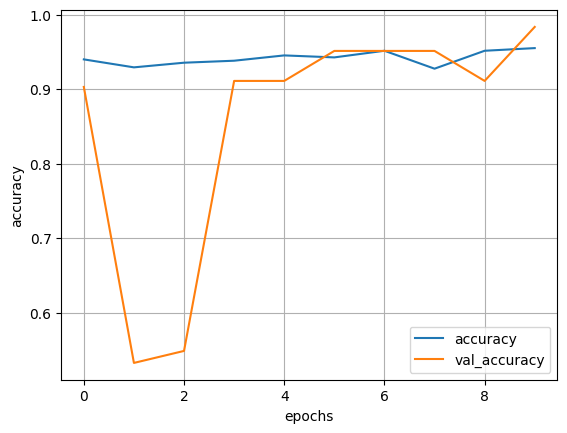

In [9]:
import pandas as pd
#Visualize accuracy
progress = {k:v for k,v in history2_FT.history.items() if k in ['accuracy', 'val_accuracy']}

pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

##Evaluate Fine tuned model

In [10]:
testLoss2_FT, testAccuracy2_FT = model2_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss2_FT, testAccuracy2_FT))

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9838 - loss: 0.0573
Test-loss: 0.059052, Test-accuracy: 0.985577


##Update model using best weights

In [11]:
model2_FT.load_weights("best_resnet_FT.weights.h5")

testLoss2_FT, testAccuracy2_FT = model2_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss2_FT, testAccuracy2_FT))

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9838 - loss: 0.0573
Test-loss: 0.059052, Test-accuracy: 0.985577


##Model performance

In [12]:
y_prob = model2_FT.predict(X_test_std)
y_predict = np.argmax(y_prob, axis=-1)
print(y_predict)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step
[1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 2 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 2 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 0 2 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 2 0 0 1 0 0 0 1
 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1
 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 2 1 1 1 1 1 0
 0 2 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 2 1 2 0 0 0 0 1 0 1 0 0 0 1 1 2
 1 0 1 0 1 1 0 0 1 0 1 2 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1
 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 2 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 1 0 2 1 0 1 0 0]


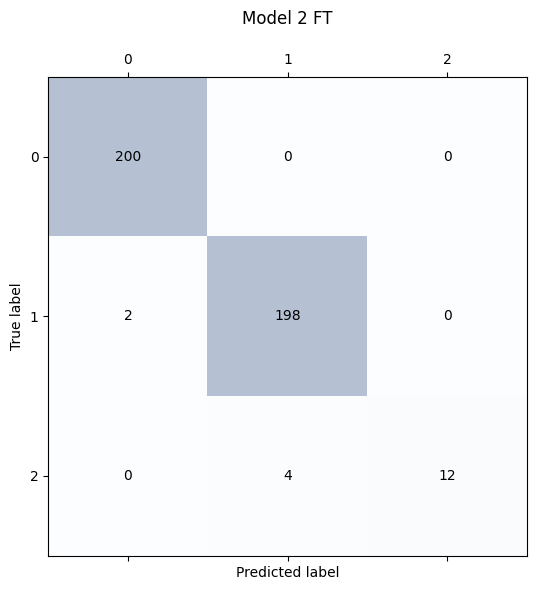

In [13]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('Model 2 FT\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix_ResNet101V2_FT.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

In [14]:
#classification scores

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  0.9857197258187357
Recall:  0.9855769230769231
F1-score:  0.9849379476245149


##Save best model

In [17]:
model2_FT.save('/content/gdrive/MyDrive/DL/ResNet101V2_Best_Model_FT.h5')